# ML model: logistic regression

In [123]:
%pylab inline
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Populating the interactive namespace from numpy and matplotlib


In [62]:
df1 = pd.read_csv('year_2019_full_data.csv')

In [63]:
df1

,rank,artist,title,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
0,1,Lil Nas X Featuring Billy Ray Cyrus,Old Town Road,2YpeDb67231RjR0MgVLzsG,0.878,0.619,6,-5.560,1,0.1020,0.053300,0.000000,0.1130,0.6390,136.041,audio_features,spotify:track:2YpeDb67231RjR0MgVLzsG,https://api.spotify.com/v1/tracks/2YpeDb67231R...,https://api.spotify.com/v1/audio-analysis/2Ype...,157067,4
1,2,Post Malone & Swae Lee,Sunflower (Spider-Man: Into The Spider-Verse),3KkXRkHbMCARz0aVfEt68P,0.760,0.479,2,-5.574,1,0.0466,0.556000,0.000000,0.0703,0.9130,89.911,audio_features,spotify:track:3KkXRkHbMCARz0aVfEt68P,https://api.spotify.com/v1/tracks/3KkXRkHbMCAR...,https://api.spotify.com/v1/audio-analysis/3KkX...,158040,4
2,3,Halsey,Without Me,5p7ujcrUXASCNwRaWNHR1C,0.752,0.488,6,-7.050,1,0.0705,0.297000,0.000009,0.0936,0.5330,136.041,audio_features,spotify:track:5p7ujcrUXASCNwRaWNHR1C,https://api.spotify.com/v1/tracks/5p7ujcrUXASC...,https://api.spotify.com/v1/audio-analysis/5p7u...,201661,4
3,4,Billie Eilish,Bad Guy,2Fxmhks0bxGSBdJ92vM42m,0.701,0.425,7,-10.965,1,0.3750,0.328000,0.130000,0.1000,0.5620,135.128,audio_features,spotify:track:2Fxmhks0bxGSBdJ92vM42m,https://api.spotify.com/v1/tracks/2Fxmhks0bxGS...,https://api.spotify.com/v1/audio-analysis/2Fxm...,194088,4
4,5,Post Malone,Wow.,7xQAfvXzm3AkraOtGPWIZg,0.829,0.539,11,-7.359,0,0.2080,0.136000,0.000002,0.1030,0.3880,99.960,audio_features,spotify:track:7xQAfvXzm3AkraOtGPWIZg,https://api.spotify.com/v1/tracks/7xQAfvXzm3Ak...,https://api.spotify.com/v1/audio-analysis/7xQA...,149547,4
5,6,Marshmello & Bastille,Happier,2dpaYNEQHiRxtZbfNsse99,0.687,0.792,5,-2.749,1,0.0452,0.191000,0.000000,0.1670,0.6710,100.015,audio_features,spotify:track:2dpaYNEQHiRxtZbfNsse99,https://api.spotify.com/v1/tracks/2dpaYNEQHiRx...,https://api.spotify.com/v1/audio-analysis/2dpa...,214290,4
6,7,Ariana Grande,7 Rings,6ocbgoVGwYJhOv1GgI9NsF,0.778,0.317,1,-10.732,0,0.3340,0.592000,0.000000,0.0881,0.3270,140.048,audio_features,spotify:track:6ocbgoVGwYJhOv1GgI9NsF,https://api.spotify.com/v1/tracks/6ocbgoVGwYJh...,https://api.spotify.com/v1/audio-analysis/6ocb...,178627,4
7,8,Khalid,Talk,6TqXcAFInzjp0bODyvrWEq,0.901,0.400,0,-8.575,1,0.1260,0.051000,0.000000,0.0599,0.3460,135.984,audio_features,spotify:track:6TqXcAFInzjp0bODyvrWEq,https://api.spotify.com/v1/tracks/6TqXcAFInzjp...,https://api.spotify.com/v1/audio-analysis/6TqX...,197573,4
8,9,Travis Scott,Sicko Mode,2xLMifQCjDGFmkHkpNLD9h,0.834,0.730,8,-3.714,1,0.2220,0.005130,0.000000,0.1240,0.4460,155.008,audio_features,spotify:track:2xLMifQCjDGFmkHkpNLD9h,https://api.spotify.com/v1/tracks/2xLMifQCjDGF...,https://api.spotify.com/v1/audio-analysis/2xLM...,312820,4
9,10,Jonas Brothers,Sucker,22vgEDb5hykfaTwLuskFGD,0.842,0.734,1,-5.065,0,0.0588,0.042700,0.000000,0.1060,0.9520,137.958,audio_features,spotify:track:22vgEDb5hykfaTwLuskFGD,https://api.spotify.com/v1/tracks/22vgEDb5hykf...,https://api.spotify.com/v1/audio-analysis/22vg...,181027,4


In [64]:
# Let's delete rows in df1
df1.drop(['rank', 'artist', 'title', 'type', 'uri', 'track_href', 'analysis_url'], axis=1, inplace=True)

In [65]:
df1

,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,2YpeDb67231RjR0MgVLzsG,0.878,0.619,6,-5.560,1,0.1020,0.053300,0.000000,0.1130,0.6390,136.041,157067,4
1,3KkXRkHbMCARz0aVfEt68P,0.760,0.479,2,-5.574,1,0.0466,0.556000,0.000000,0.0703,0.9130,89.911,158040,4
2,5p7ujcrUXASCNwRaWNHR1C,0.752,0.488,6,-7.050,1,0.0705,0.297000,0.000009,0.0936,0.5330,136.041,201661,4
3,2Fxmhks0bxGSBdJ92vM42m,0.701,0.425,7,-10.965,1,0.3750,0.328000,0.130000,0.1000,0.5620,135.128,194088,4
4,7xQAfvXzm3AkraOtGPWIZg,0.829,0.539,11,-7.359,0,0.2080,0.136000,0.000002,0.1030,0.3880,99.960,149547,4
5,2dpaYNEQHiRxtZbfNsse99,0.687,0.792,5,-2.749,1,0.0452,0.191000,0.000000,0.1670,0.6710,100.015,214290,4
6,6ocbgoVGwYJhOv1GgI9NsF,0.778,0.317,1,-10.732,0,0.3340,0.592000,0.000000,0.0881,0.3270,140.048,178627,4
7,6TqXcAFInzjp0bODyvrWEq,0.901,0.400,0,-8.575,1,0.1260,0.051000,0.000000,0.0599,0.3460,135.984,197573,4
8,2xLMifQCjDGFmkHkpNLD9h,0.834,0.730,8,-3.714,1,0.2220,0.005130,0.000000,0.1240,0.4460,155.008,312820,4
9,22vgEDb5hykfaTwLuskFGD,0.842,0.734,1,-5.065,0,0.0588,0.042700,0.000000,0.1060,0.9520,137.958,181027,4


In [66]:
# Let's get another dataframe with the audio features of 100 random songs

df2 = pd.read_csv('100_random_tracks_with_audio_features.csv')
df2

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,track_id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.707,0.2380,3,-8.818,1,0.0379,0.090500,0.000002,0.0842,0.3450,124.156,audio_features,1boXOL0ua7N2iCOUVI1p9F,spotify:track:1boXOL0ua7N2iCOUVI1p9F,https://api.spotify.com/v1/tracks/1boXOL0ua7N2...,https://api.spotify.com/v1/audio-analysis/1boX...,270847,3
1,0.732,0.5530,7,-7.406,1,0.0990,0.082000,0.000008,0.1410,0.2910,125.311,audio_features,4qzk9R04fB1EdGiaovnKEH,spotify:track:4qzk9R04fB1EdGiaovnKEH,https://api.spotify.com/v1/tracks/4qzk9R04fB1E...,https://api.spotify.com/v1/audio-analysis/4qzk...,197307,5
2,0.735,0.6550,9,-4.374,1,0.2360,0.123000,0.000000,0.1060,0.6190,160.055,audio_features,0MvqSYPr5Wi62JB7VWvqwz,spotify:track:0MvqSYPr5Wi62JB7VWvqwz,https://api.spotify.com/v1/tracks/0MvqSYPr5Wi6...,https://api.spotify.com/v1/audio-analysis/0Mvq...,181867,4
3,0.640,0.6000,7,-6.341,1,0.0948,0.075000,0.000079,0.0752,0.6270,175.832,audio_features,2kIZPLtqtmDh3dX6HuAfD0,spotify:track:2kIZPLtqtmDh3dX6HuAfD0,https://api.spotify.com/v1/tracks/2kIZPLtqtmDh...,https://api.spotify.com/v1/audio-analysis/2kIZ...,297800,4
4,0.883,0.5460,8,-3.793,1,0.1420,0.010700,0.001500,0.0730,0.9160,143.998,audio_features,23LAuKGYTIW6rrCiZqvDZG,spotify:track:23LAuKGYTIW6rrCiZqvDZG,https://api.spotify.com/v1/tracks/23LAuKGYTIW6...,https://api.spotify.com/v1/audio-analysis/23LA...,185318,4
5,0.341,0.3270,7,-13.615,0,0.0372,0.905000,0.880000,0.1590,0.2160,111.353,audio_features,5yyMm46TlDeyPalqWwzbah,spotify:track:5yyMm46TlDeyPalqWwzbah,https://api.spotify.com/v1/tracks/5yyMm46TlDey...,https://api.spotify.com/v1/audio-analysis/5yyM...,442373,4
6,0.523,0.6780,8,-6.071,1,0.0692,0.000616,0.000000,0.1420,0.2770,159.909,audio_features,0INehbMZOFPnaPBAjK97i3,spotify:track:0INehbMZOFPnaPBAjK97i3,https://api.spotify.com/v1/tracks/0INehbMZOFPn...,https://api.spotify.com/v1/audio-analysis/0INe...,244194,4
7,0.622,0.5400,5,-13.990,1,0.0261,0.017000,0.007710,0.2650,0.8470,130.879,audio_features,19Ym5Sg0YyOCa6ao21bdoG,spotify:track:19Ym5Sg0YyOCa6ao21bdoG,https://api.spotify.com/v1/tracks/19Ym5Sg0YyOC...,https://api.spotify.com/v1/audio-analysis/19Ym...,264907,4
8,0.791,0.6770,5,-9.724,1,0.0356,0.776000,0.001210,0.2240,0.8760,110.640,audio_features,71GvlH0VdeClloLIkHrAVu,spotify:track:71GvlH0VdeClloLIkHrAVu,https://api.spotify.com/v1/tracks/71GvlH0VdeCl...,https://api.spotify.com/v1/audio-analysis/71Gv...,349280,4
9,0.462,0.6320,5,-7.438,1,0.0248,0.091000,0.000000,0.3970,0.5850,74.268,audio_features,1eT2CjXwFXNx6oY5ydvzKU,spotify:track:1eT2CjXwFXNx6oY5ydvzKU,https://api.spotify.com/v1/tracks/1eT2CjXwFXNx...,https://api.spotify.com/v1/audio-analysis/1eT2...,238854,4


In [68]:
df2.drop(['type', 'uri', 'track_href', 'analysis_url'], axis=1, inplace=True)

In [71]:
# Putting 'track_id' colum at the beginning

df2 = df2[['track_id', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 
          'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']]

In [72]:
df2

,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,1boXOL0ua7N2iCOUVI1p9F,0.707,0.2380,3,-8.818,1,0.0379,0.090500,0.000002,0.0842,0.3450,124.156,270847,3
1,4qzk9R04fB1EdGiaovnKEH,0.732,0.5530,7,-7.406,1,0.0990,0.082000,0.000008,0.1410,0.2910,125.311,197307,5
2,0MvqSYPr5Wi62JB7VWvqwz,0.735,0.6550,9,-4.374,1,0.2360,0.123000,0.000000,0.1060,0.6190,160.055,181867,4
3,2kIZPLtqtmDh3dX6HuAfD0,0.640,0.6000,7,-6.341,1,0.0948,0.075000,0.000079,0.0752,0.6270,175.832,297800,4
4,23LAuKGYTIW6rrCiZqvDZG,0.883,0.5460,8,-3.793,1,0.1420,0.010700,0.001500,0.0730,0.9160,143.998,185318,4
5,5yyMm46TlDeyPalqWwzbah,0.341,0.3270,7,-13.615,0,0.0372,0.905000,0.880000,0.1590,0.2160,111.353,442373,4
6,0INehbMZOFPnaPBAjK97i3,0.523,0.6780,8,-6.071,1,0.0692,0.000616,0.000000,0.1420,0.2770,159.909,244194,4
7,19Ym5Sg0YyOCa6ao21bdoG,0.622,0.5400,5,-13.990,1,0.0261,0.017000,0.007710,0.2650,0.8470,130.879,264907,4
8,71GvlH0VdeClloLIkHrAVu,0.791,0.6770,5,-9.724,1,0.0356,0.776000,0.001210,0.2240,0.8760,110.640,349280,4
9,1eT2CjXwFXNx6oY5ydvzKU,0.462,0.6320,5,-7.438,1,0.0248,0.091000,0.000000,0.3970,0.5850,74.268,238854,4


In [79]:
df1['success'] = np.ones(100)
df1

,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,success
0,2YpeDb67231RjR0MgVLzsG,0.878,0.619,6,-5.560,1,0.1020,0.053300,0.000000,0.1130,0.6390,136.041,157067,4,1.0
1,3KkXRkHbMCARz0aVfEt68P,0.760,0.479,2,-5.574,1,0.0466,0.556000,0.000000,0.0703,0.9130,89.911,158040,4,1.0
2,5p7ujcrUXASCNwRaWNHR1C,0.752,0.488,6,-7.050,1,0.0705,0.297000,0.000009,0.0936,0.5330,136.041,201661,4,1.0
3,2Fxmhks0bxGSBdJ92vM42m,0.701,0.425,7,-10.965,1,0.3750,0.328000,0.130000,0.1000,0.5620,135.128,194088,4,1.0
4,7xQAfvXzm3AkraOtGPWIZg,0.829,0.539,11,-7.359,0,0.2080,0.136000,0.000002,0.1030,0.3880,99.960,149547,4,1.0
5,2dpaYNEQHiRxtZbfNsse99,0.687,0.792,5,-2.749,1,0.0452,0.191000,0.000000,0.1670,0.6710,100.015,214290,4,1.0
6,6ocbgoVGwYJhOv1GgI9NsF,0.778,0.317,1,-10.732,0,0.3340,0.592000,0.000000,0.0881,0.3270,140.048,178627,4,1.0
7,6TqXcAFInzjp0bODyvrWEq,0.901,0.400,0,-8.575,1,0.1260,0.051000,0.000000,0.0599,0.3460,135.984,197573,4,1.0
8,2xLMifQCjDGFmkHkpNLD9h,0.834,0.730,8,-3.714,1,0.2220,0.005130,0.000000,0.1240,0.4460,155.008,312820,4,1.0
9,22vgEDb5hykfaTwLuskFGD,0.842,0.734,1,-5.065,0,0.0588,0.042700,0.000000,0.1060,0.9520,137.958,181027,4,1.0


In [92]:
df2['success'] = np.zeros(100)
df2

/Users/disidro/opt/anaconda3/envs/renv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,success
0,1boXOL0ua7N2iCOUVI1p9F,0.707,0.2380,3,-8.818,1,0.0379,0.090500,0.000002,0.0842,0.3450,124.156,270847,3,0.0
1,4qzk9R04fB1EdGiaovnKEH,0.732,0.5530,7,-7.406,1,0.0990,0.082000,0.000008,0.1410,0.2910,125.311,197307,5,0.0
2,0MvqSYPr5Wi62JB7VWvqwz,0.735,0.6550,9,-4.374,1,0.2360,0.123000,0.000000,0.1060,0.6190,160.055,181867,4,0.0
3,2kIZPLtqtmDh3dX6HuAfD0,0.640,0.6000,7,-6.341,1,0.0948,0.075000,0.000079,0.0752,0.6270,175.832,297800,4,0.0
4,23LAuKGYTIW6rrCiZqvDZG,0.883,0.5460,8,-3.793,1,0.1420,0.010700,0.001500,0.0730,0.9160,143.998,185318,4,0.0
5,5yyMm46TlDeyPalqWwzbah,0.341,0.3270,7,-13.615,0,0.0372,0.905000,0.880000,0.1590,0.2160,111.353,442373,4,0.0
6,0INehbMZOFPnaPBAjK97i3,0.523,0.6780,8,-6.071,1,0.0692,0.000616,0.000000,0.1420,0.2770,159.909,244194,4,0.0
7,19Ym5Sg0YyOCa6ao21bdoG,0.622,0.5400,5,-13.990,1,0.0261,0.017000,0.007710,0.2650,0.8470,130.879,264907,4,0.0
8,71GvlH0VdeClloLIkHrAVu,0.791,0.6770,5,-9.724,1,0.0356,0.776000,0.001210,0.2240,0.8760,110.640,349280,4,0.0
9,1eT2CjXwFXNx6oY5ydvzKU,0.462,0.6320,5,-7.438,1,0.0248,0.091000,0.000000,0.3970,0.5850,74.268,238854,4,0.0


In [86]:
df = pd.concat([df1, df2], ignore_index=True)

In [87]:
df

,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,success
0,2YpeDb67231RjR0MgVLzsG,0.878,0.6190,6,-5.560,1,0.1020,0.053300,0.000000,0.1130,0.6390,136.041,157067,4,1.0
1,3KkXRkHbMCARz0aVfEt68P,0.760,0.4790,2,-5.574,1,0.0466,0.556000,0.000000,0.0703,0.9130,89.911,158040,4,1.0
2,5p7ujcrUXASCNwRaWNHR1C,0.752,0.4880,6,-7.050,1,0.0705,0.297000,0.000009,0.0936,0.5330,136.041,201661,4,1.0
3,2Fxmhks0bxGSBdJ92vM42m,0.701,0.4250,7,-10.965,1,0.3750,0.328000,0.130000,0.1000,0.5620,135.128,194088,4,1.0
4,7xQAfvXzm3AkraOtGPWIZg,0.829,0.5390,11,-7.359,0,0.2080,0.136000,0.000002,0.1030,0.3880,99.960,149547,4,1.0
5,2dpaYNEQHiRxtZbfNsse99,0.687,0.7920,5,-2.749,1,0.0452,0.191000,0.000000,0.1670,0.6710,100.015,214290,4,1.0
6,6ocbgoVGwYJhOv1GgI9NsF,0.778,0.3170,1,-10.732,0,0.3340,0.592000,0.000000,0.0881,0.3270,140.048,178627,4,1.0
7,6TqXcAFInzjp0bODyvrWEq,0.901,0.4000,0,-8.575,1,0.1260,0.051000,0.000000,0.0599,0.3460,135.984,197573,4,1.0
8,2xLMifQCjDGFmkHkpNLD9h,0.834,0.7300,8,-3.714,1,0.2220,0.005130,0.000000,0.1240,0.4460,155.008,312820,4,1.0
9,22vgEDb5hykfaTwLuskFGD,0.842,0.7340,1,-5.065,0,0.0588,0.042700,0.000000,0.1060,0.9520,137.958,181027,4,1.0


In [185]:
df.to_csv('100_hit_100_non_hit_songs.csv', encoding='utf-8', index=False)

In [158]:
# Starting with the ML model, just with two values at the beginning

X = df[['danceability', 'energy']].values
y = df['success']

In [159]:
def draw(clf,X,y,h=0.05):
    
    plt.figure(figsize=(10,10))

    x_min, x_max = X[:, 0].min() - 0.05, X[:, 0].max() + .05
    y_min, y_max = X[:, 1].min() - .05, X[:, 1].max() + .05
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    if clf is not None:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.scatter(xx,yy,c=Z)
    else:
        plt.scatter(xx,yy)
    
    plt.scatter(X[:,0],X[:,1],c=y,cmap='bwr')

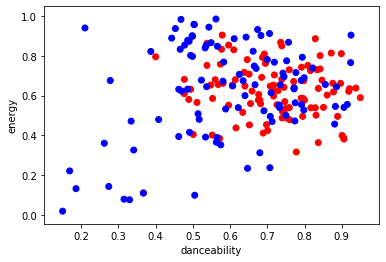

In [160]:
plt.scatter(df['danceability'], df['energy'],c=df['success'],cmap='bwr');
plt.xlabel('danceability');
plt.ylabel('energy');

## Logistic Regression

In [161]:
from sklearn.linear_model import LogisticRegression

In [162]:
clf = LogisticRegression()

In [163]:
clf.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [164]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [165]:
clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [166]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,clf.predict(X_test))

0.6

In [167]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf,X,y,cv=5,scoring="accuracy").mean()

0.645

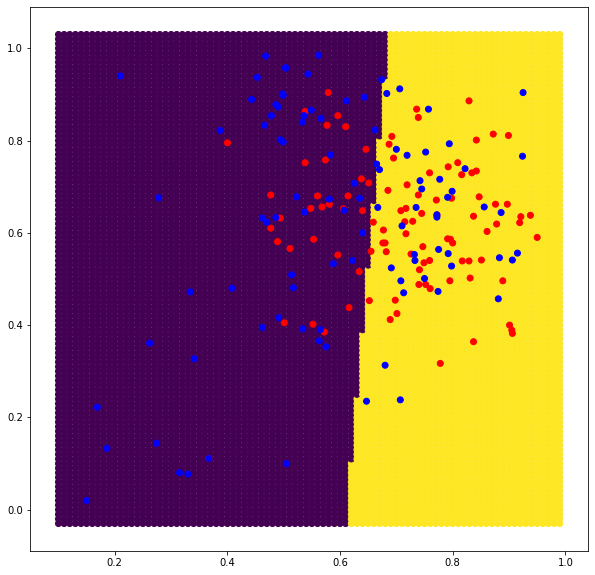

In [168]:
draw(clf,X,y,h=0.01)

## K nearest neighbors Classifier

In [170]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors=5)

In [171]:
cross_val_score(clf,X,y,scoring="accuracy").mean()

0.6050000000000001

In [172]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [173]:
reg = GridSearchCV(KNeighborsClassifier(),
                  param_grid={"n_neighbors":np.arange(4,100)},
                  cv=5,
                  scoring="accuracy")

In [174]:
reg.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
       55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
       72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88,
       89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy

In [175]:
reg.best_score_

0.655

In [176]:
reg.best_params_

{'n_neighbors': 27}

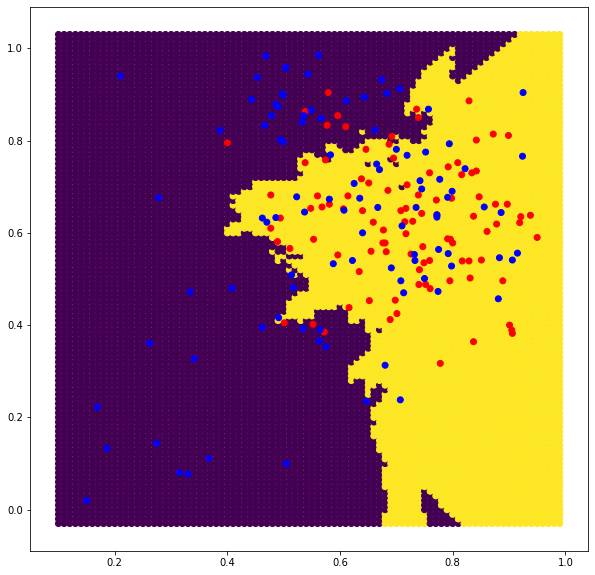

In [177]:
draw(reg.best_estimator_,X,y,0.01)

In [178]:
clfk = reg.best_estimator_

In [179]:
from sklearn.metrics import confusion_matrix

In [180]:
import seaborn as sns

In [181]:
confusion_matrix(y_test,clfk.predict(X_test))

array([[5, 5],
       [2, 8]])

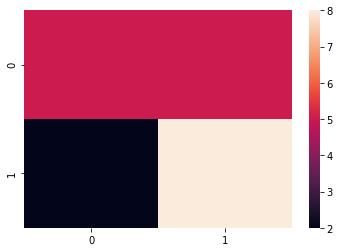

In [182]:
sns.heatmap(confusion_matrix(y_test,clfk.predict(X_test)))

In [183]:
from sklearn.metrics import classification_report

In [184]:
print(classification_report(y_test,clfk.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.71      0.50      0.59        10
         1.0       0.62      0.80      0.70        10

    accuracy                           0.65        20
   macro avg       0.66      0.65      0.64        20
weighted avg       0.66      0.65      0.64        20

